In [1]:
# imporint the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# importing the dataset which is a csv file
dataset = pd.read_csv('Datasets/Youtube01-Psy.csv')

In [3]:
# FEATURE ENGINEERING : SELECTING ONLY THE REQUIRED FEATURES
comments = dataset.iloc[:,3].values
classes  = dataset.iloc[:,4].values

In [4]:
# FITTIN THE VECTORIZING MODEL TO THE WORDS SO THAT THEY CAN BE EASILY FITTED TO MACHINE LEARNING MODEL
vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(comments)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [5]:
# SPLITTING INTO TRAINING AND TESTING DATA
x_train , x_test , y_train , y_test = train_test_split(comments , classes)

In [6]:
# TRANSFORMING THE TRAIN AND TEST SET TO VECTORS
x_train = vectorizer.transform(x_train)
x_test  = vectorizer.transform(x_test)

In [7]:
# DECLARING THE CLASSIFIER WITH MAXIMUM ITERATION OF 1000 BUT IT CAN BE LEFT DEFAULT TO 100
classifier = LogisticRegression(max_iter=1000)

In [8]:
# FITTING THE LOGISTIC REGRESSION MODEL TO THE TRAINNING DATA 
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
# PREDICTING THE OUTCOMES ON THE TEST SET
prediction = classifier.predict(x_test)

$EVALUATING$ $THE$ $MODELS$ $PREDICTION$

In [10]:
# CHECKING THE ACCURACY ON TRAIN SET 
classifier.score(x_train,y_train) * 100 

100.0

In [11]:
# CHECKING THE ACCURACY ON TEST SET (^_^) WE GOT 94.3 % 
classifier.score(x_test,y_test) * 100

95.45454545454545

In [12]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test,prediction)

In [13]:
# ONLY 5 WWRONG PREDICTIONS AND 44 + 39 = 83 CORRECT PREDICTION 
cm

array([[43,  1],
       [ 3, 41]], dtype=int64)

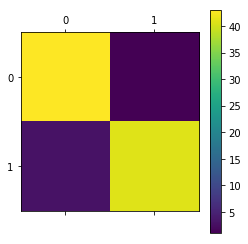

In [14]:
# VISUALIZING THE CONFUSION MATRIX
plt.matshow(cm)
plt.colorbar()

In [15]:
# DEFINING A FUNCTION FOR PREDICTING THE RESULT ON NEW DATA
def predict(x):
    x = vectorizer.transform(x)
    new_pred = classifier.predict(x)
    return new_pred

In [16]:
# CREATING A LIST OF NEW COMMENTS WHICH WE WANT TO TEST
new_ones = ['hahaha lol ! thts great' ,
            'want to earn money online goto slp.com',
            'WATCH MY VIDEOS AND SUBSCRIBE LneaDw26bFvxF3dtP-JPmr1RRfbcmnhR8cXBDGWcO2M,AllDailyVines',
            'You can make money online and start working from home today as I am!   I am making over $3,000+ per month at MONEYGQ.COM !   Visit MONEYGQ.COM and check it out!  ']

In [17]:
new_ones

['hahaha lol ! thts great',
 'want to earn money online goto slp.com',
 'WATCH MY VIDEOS AND SUBSCRIBE LneaDw26bFvxF3dtP-JPmr1RRfbcmnhR8cXBDGWcO2M,AllDailyVines',
 'You can make money online and start working from home today as I am!   I am making over $3,000+ per month at MONEYGQ.COM !   Visit MONEYGQ.COM and check it out!  ']

In [18]:
# 100 % CORRECT PREDICTION ONLY THE FIRST COMMENT IS OK AND OTHERS ARE SPAM
predict(new_ones)

array([0, 1, 1, 1], dtype=int64)

## $NOW$ $LET'S$ $CLASSIFY$ $THE$ $DATA$ $WITH$ $KNN$ $CLASSIFIER$

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=3)

In [21]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=3, n_neighbors=3, p=2,
           weights='uniform')

In [22]:
knn_preds = knn.predict(x_test)

In [23]:
cm_knn = confusion_matrix(y_test,knn_preds)

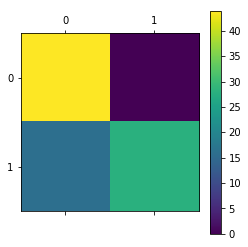

In [24]:
plt.matshow(cm_knn)
plt.colorbar()

In [25]:
cm_knn

array([[44,  0],
       [16, 28]], dtype=int64)

In [ ]:
knn.score(x_test,y_test) * 100

## $CLASSIFICATION$ $REPORTS$ $OF$ $BOTH$ $THE$ $CLASSIFIERS$ $:$

In [ ]:
# CLASSIFICATION REPORT OF LOGISTIC REGRESSION
print(classification_report(y_test,prediction))


In [ ]:
# CLASSIFICATION REPORT OF KNN ALGORITHM
print(classification_report(y_test,knn_preds))